In [1]:
import numpy as np
import pandas as pd 

In [2]:
dataset = pd.read_csv('../input/test.csv')
dataset.head()

,ParentId,clean
0,469,'How can I find the full path to a font from i...
1,502,'Get a preview JPEG of a PDF on Windows?' 'I h...
2,683,"""Using 'in' to match an attribute of Python ob..."
3,766,'Python and MySQL' 'I can get Python to work w...
4,1734,'Any experiences with Protocol Buffers?' 'I wa...


In [3]:
dataset['word_count'] = dataset['clean'].apply(lambda x: len(str(x).split(" ")))
dataset[['clean','word_count']].head()

,clean,word_count
0,'How can I find the full path to a font from i...,361
1,'Get a preview JPEG of a PDF on Windows?' 'I h...,350
2,"""Using 'in' to match an attribute of Python ob...",1017
3,'Python and MySQL' 'I can get Python to work w...,512
4,'Any experiences with Protocol Buffers?' 'I wa...,306


In [4]:
dataset.word_count.describe()

count    145239.000000
mean        432.178244
std         504.673841
min           2.000000
25%         181.000000
50%         301.000000
75%         508.000000
max       20504.000000
Name: word_count, dtype: float64

In [5]:
freq = pd.Series(' '.join(dataset['clean']).split()).value_counts()[:20]
freq

the     1632415
to      1122216
=       1059807
a        802494
in       747206
is       604063
and      548770
I        524098
of       494960
for      404358
you      363067
that     338366
it       331427
with     264829
if       261981
this     260733
not      218243
as       211941
have     206214
be       205027
dtype: int64

In [6]:
freq1 =  pd.Series(' '.join(dataset 
         ['clean']).split()).value_counts()[-20:]
freq1

header.nnThanksnRalphn'                                         1
Session.configure(bind=self.engine)nn'                          1
wx.EmptyImage(500500)n                                          1
"ldoce5"n                                                       1
comena                                                          1
call_obj(heldab);                                               1
numpy.array(genfromtxt_vlhp)nnprint(relevant_columns)nnnThis    1
range(x)):n                                                     1
underscores!-).                                                 1
defined_name                                                    1
position="before"n'                                             1
b1-da                                                           1
python:nn@webiopi.macrondef                                     1
sever?n'                                                        1
http://www.spiegelfechter.com/wordpress/8426/sparzwangn         1
GuestAssoc

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [9]:
stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [10]:
corpus = []
for i in range(0, 3847):
    text = re.sub('[^a-zA-Z]', ' ', dataset['clean'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    ps=PorterStemmer()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

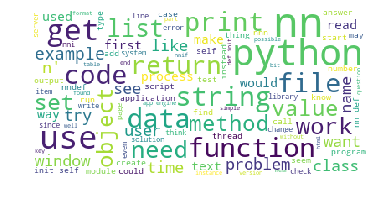

In [11]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [13]:
list(cv.vocabulary_.keys())[:10]

['find',
 'full',
 'path',
 'font',
 'display',
 'name',
 'mac',
 'javascript',
 'api',
 'given']

[Text(0, 0, 'python'),
 Text(0, 0, 'nn'),
 Text(0, 0, 'self'),
 Text(0, 0, 'file'),
 Text(0, 0, 'use'),
 Text(0, 0, 'get'),
 Text(0, 0, 'string'),
 Text(0, 0, 'return'),
 Text(0, 0, 'code'),
 Text(0, 0, 'like'),
 Text(0, 0, 'line'),
 Text(0, 0, 'name'),
 Text(0, 0, 'print'),
 Text(0, 0, 'data'),
 Text(0, 0, 'time'),
 Text(0, 0, 'function'),
 Text(0, 0, 'need'),
 Text(0, 0, 'object'),
 Text(0, 0, 'way'),
 Text(0, 0, 'would')]

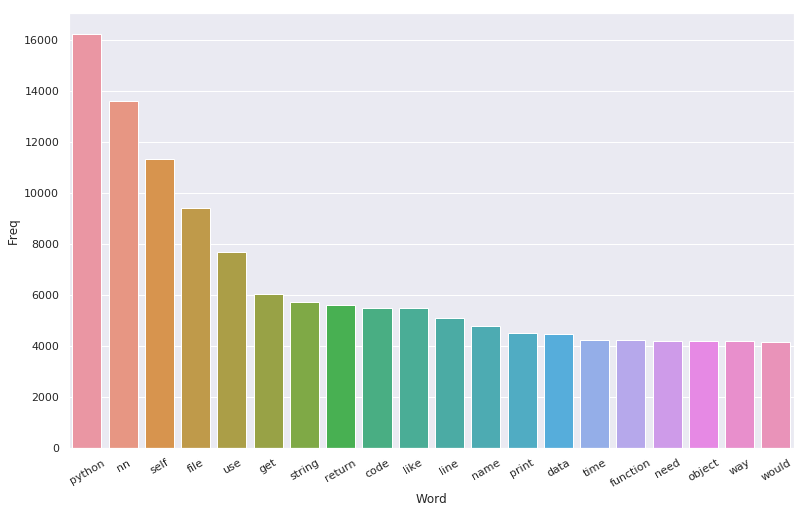

In [14]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0           init self  1156
1              nn def  1035
2          app engine   934
3            def init   846
4      something like   809
5             py line   662
6           self self   624
7           look like   577
8          google app   576
9            http www   542
10         python org   485
11  datetime datetime   470
12      python script   466
13         would like   453
14            usr bin   421
15          name main   417
16   subprocess popen   378
17   google appengine   377
18          nn import   366
19         lib python   361


[Text(0, 0, 'init self'),
 Text(0, 0, 'nn def'),
 Text(0, 0, 'app engine'),
 Text(0, 0, 'def init'),
 Text(0, 0, 'something like'),
 Text(0, 0, 'py line'),
 Text(0, 0, 'self self'),
 Text(0, 0, 'look like'),
 Text(0, 0, 'google app'),
 Text(0, 0, 'http www'),
 Text(0, 0, 'python org'),
 Text(0, 0, 'datetime datetime'),
 Text(0, 0, 'python script'),
 Text(0, 0, 'would like'),
 Text(0, 0, 'usr bin'),
 Text(0, 0, 'name main'),
 Text(0, 0, 'subprocess popen'),
 Text(0, 0, 'google appengine'),
 Text(0, 0, 'nn import'),
 Text(0, 0, 'lib python')]

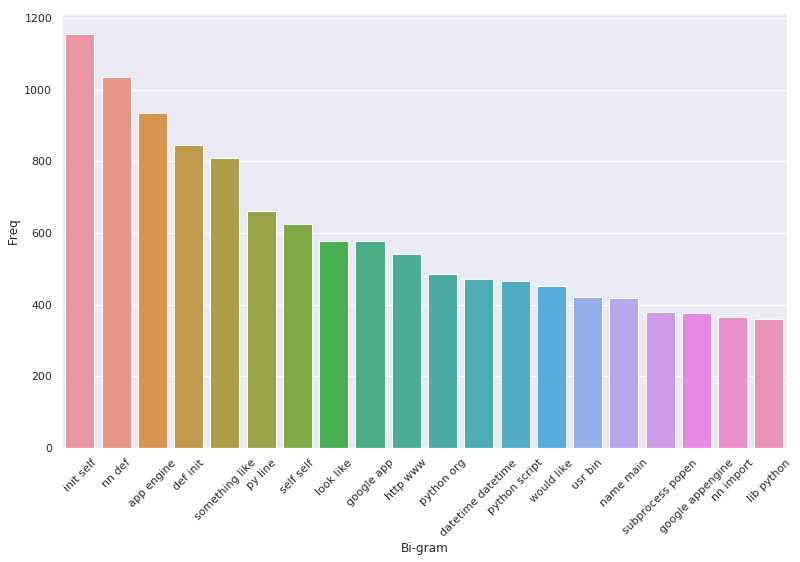

In [15]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                      Tri-gram  Freq
0                def init self   772
1            google app engine   555
2             recent call last   291
3               call last file   249
4               doc python org   234
5               nnif name main   224
6                   nn usr bin   220
7               init self self   217
8           python org library   178
9              code google com   169
10            init self parent   164
11                 usr bin env   156
12              usr lib python   155
13             object def init   146
14    library framework python   139
15        google appengine ext   138
16  framework python framework   138
17      stdout subprocess pipe   134
18                 nn def init   133
19             http doc python   132


[Text(0, 0, 'def init self'),
 Text(0, 0, 'google app engine'),
 Text(0, 0, 'recent call last'),
 Text(0, 0, 'call last file'),
 Text(0, 0, 'doc python org'),
 Text(0, 0, 'nnif name main'),
 Text(0, 0, 'nn usr bin'),
 Text(0, 0, 'init self self'),
 Text(0, 0, 'python org library'),
 Text(0, 0, 'code google com'),
 Text(0, 0, 'init self parent'),
 Text(0, 0, 'usr bin env'),
 Text(0, 0, 'usr lib python'),
 Text(0, 0, 'object def init'),
 Text(0, 0, 'library framework python'),
 Text(0, 0, 'google appengine ext'),
 Text(0, 0, 'framework python framework'),
 Text(0, 0, 'stdout subprocess pipe'),
 Text(0, 0, 'nn def init'),
 Text(0, 0, 'http doc python')]

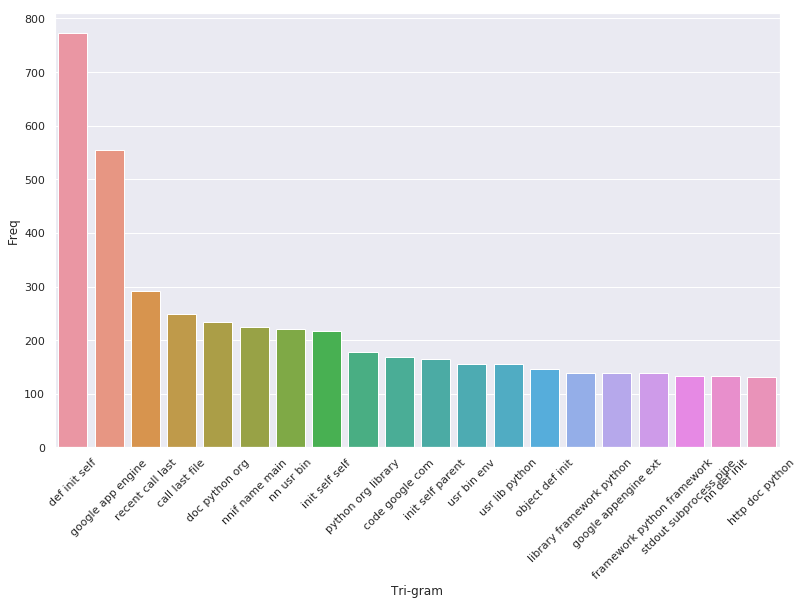

In [16]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[800]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [18]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
getting name active window want write python script window save title program user us given time like http www rescuetime com ni want use rescuetime privacy consideration instead write script something similar capture data much use computer nnis easy command use read information n daniwebnn import win guin w win guin w getwindowtext w getforegroundwindow nn

Keywords:
win 0.258
active window 0.238
script window 0.232
window want 0.224
write script 0.218
